In [32]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

# Custom Colors
MAGENTA = "#6C3483"
GREEN = "#239B56"
BLUE = "#5DADE2"

In [33]:
dataframe = pd.read_csv("data/database.csv", low_memory=False)
dataframe.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_coordinates,return_coordinates,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.000,401.000,0.261,"(60.1952452, 24.9018997)","(60.1975724, 24.9267808)",0.900
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.000,869.000,0.100,"(60.1686095, 24.9305373)","(60.1650171805, 24.94947287873)",0.900
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.000,469.000,0.227,"(60.19553971683871, 25.053580944057305)","(60.187234122757424, 25.036412289626025)",0.900
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.000,2406.000,0.186,"(60.227827, 24.819614)","(60.2034735, 24.8989297)",0.900
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Messitytönkatu,121.0,Vilhonvuorenkatu,7120.000,1679.000,0.254,NaN,"(60.1864633, 24.9678718)",0.900


In [34]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12158563 entries, 0 to 12158562
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   departure               object 
 1   return                  object 
 2   departure_id            object 
 3   departure_name          object 
 4   return_id               object 
 5   return_name             object 
 6   distance (m)            float64
 7   duration (sec.)         float64
 8   avg_speed (km/h)        float64
 9   departure_coordinates   object 
 10  return_coordinates      object 
 11  Air temperature (degC)  float64
dtypes: float64(4), object(8)
memory usage: 1.1+ GB


In [35]:
dataframe[['departure','return']] =  dataframe[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12158563 entries, 0 to 12158562
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   departure               datetime64[ns]
 1   return                  datetime64[ns]
 2   departure_id            object        
 3   departure_name          object        
 4   return_id               object        
 5   return_name             object        
 6   distance (m)            float64       
 7   duration (sec.)         float64       
 8   avg_speed (km/h)        float64       
 9   departure_coordinates   object        
 10  return_coordinates      object        
 11  Air temperature (degC)  float64       
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 1.1+ GB


In [36]:
dataframe = dataframe.rename(columns={'distance (m)': 'distance',
                                     'duration (sec.)': 'duration',
                                     'avg_speed (km/h)':'speed',
                                      'Air temperature (degC)':'temperature',
                                     })
dataframe.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance,duration,speed,departure_coordinates,return_coordinates,temperature
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.000,401.000,0.261,"(60.1952452, 24.9018997)","(60.1975724, 24.9267808)",0.900
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.000,869.000,0.100,"(60.1686095, 24.9305373)","(60.1650171805, 24.94947287873)",0.900
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.000,469.000,0.227,"(60.19553971683871, 25.053580944057305)","(60.187234122757424, 25.036412289626025)",0.900
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.000,2406.000,0.186,"(60.227827, 24.819614)","(60.2034735, 24.8989297)",0.900
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Messitytönkatu,121.0,Vilhonvuorenkatu,7120.000,1679.000,0.254,NaN,"(60.1864633, 24.9678718)",0.900


In [37]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
dataframe[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,12158427.000,12158541.000,12142661.000
mean,2295.152,961.929,15.650
std,24519.771,7387.482,5.498
min,-4292467.000,0.000,-5.200
25%,1000.000,344.000,12.300
50%,1739.000,586.000,16.400
75%,2868.000,971.000,19.300
max,3681399.000,5401659.000,32.900


In [38]:
dataframe = dataframe[ 
                    (50 < dataframe['distance']) & (dataframe['distance'] < 10000) &
                    (120 < dataframe['duration']) & (dataframe['duration'] <  18000) &
                    (-20 < dataframe['temperature']) & (dataframe['temperature'] < 50)        
                    ]

dataframe[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,11278877.000,11278877.000,11278877.000
mean,2242.380,783.618,15.637
std,1494.710,795.956,5.495
min,51.000,121.000,-5.200
25%,1121.000,380.000,12.300
50%,1847.000,615.000,16.400
75%,2964.000,991.000,19.300
max,9999.000,17998.000,32.900


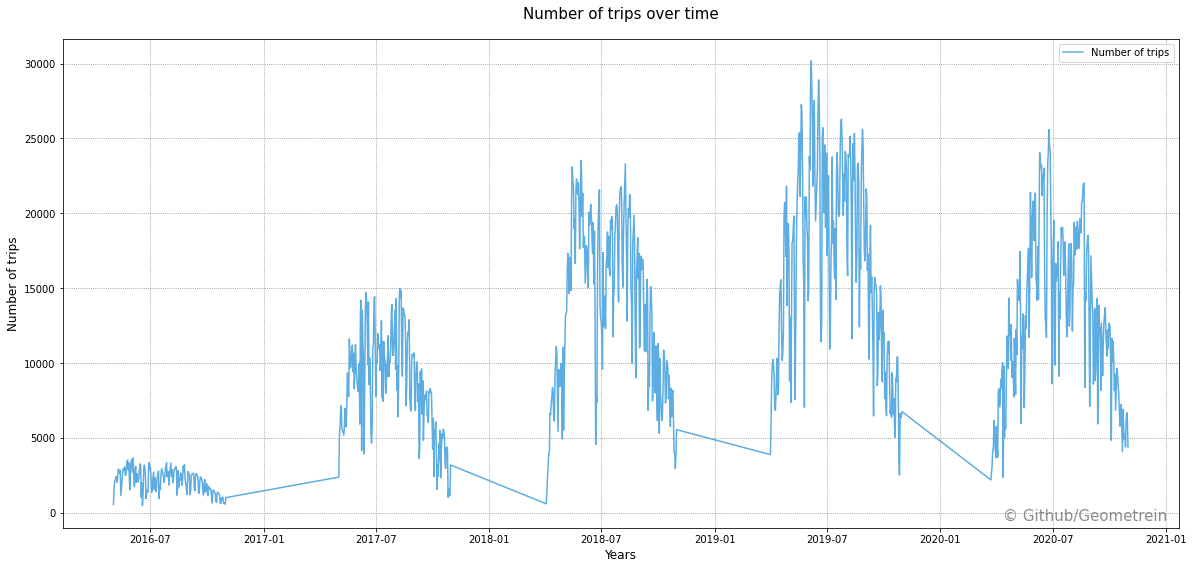

In [39]:
def tripsByYear(dataframe):
    """
    Number of trips over the years
    """
    # Data 
    df = dataframe.copy()
    df_over_time = df.groupby(df['departure'].dt.date).size().reset_index(name='count')

    # Figure
    fig, ax = plt.subplots(figsize=(20,9))
    plt.plot(df_over_time["departure"], df_over_time["count"], color= BLUE)

    # Labels
    ax.set_title("Number of trips over time", fontsize= 15, pad= 20)
    ax.set_ylabel("Number of trips", fontsize=12)
    ax.set_xlabel("Years", fontsize=12)

    # Grid & Legend
    plt.grid(linestyle=":", color='grey')
    plt.legend(["Number of trips"])

    # Watermark
    ax.text(0.99, 0.01, '© Github/Geometrein',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.9)

    plt.show()

tripsByYear(dataframe)

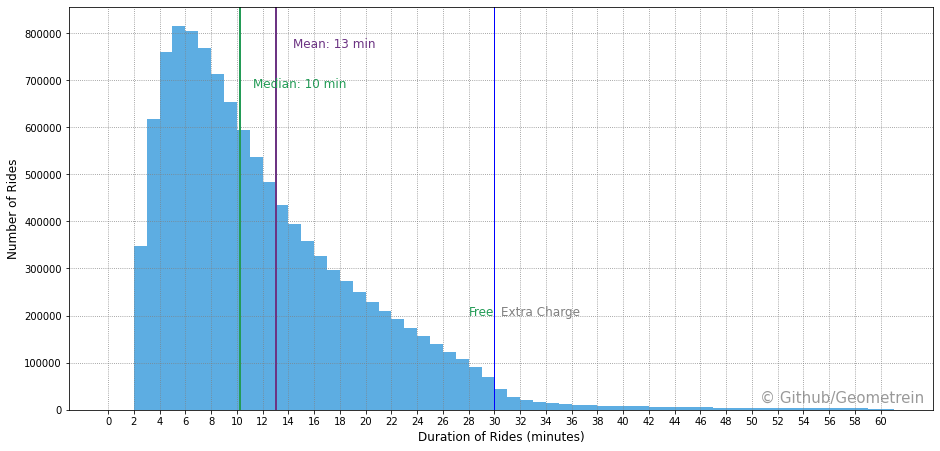

In [40]:
def duration(dataframe):
    """
    """
    df = dataframe.copy()
    
    # Converting seconds to minutes
    df["duration"] = df["duration"]/60
    
    # Filtering relevant data
    duration_data = df["duration"]
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    # Ploting the histogram
    plt.hist(duration_data, bins = range(62), color = BLUE, histtype ="bar")

    # Adding median and mean lines
    plt.axvline(df["duration"].mean(), color=MAGENTA, linestyle='-', linewidth=2 )
    plt.axvline(df["duration"].median(), color=GREEN, linestyle='-', linewidth=2 )
    plt.axvline(x = 30, color="blue", linestyle='-', linewidth=1 )

    # Adding median and mean texts
    min_ylim, max_ylim = plt.ylim()
    plt.text(df["duration"].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f} min'.format(df["duration"].mean()), color = MAGENTA,  fontsize= 12)
    plt.text(df["duration"].median()*1.1, max_ylim*0.8, 'Median: {:.0f} min'.format(df["duration"].median()), color = GREEN, fontsize= 12)
    plt.text(x= 28,y=200000, s="Free", color = GREEN, fontsize= 12)
    plt.text(x= 30.5,y=200000, s="Extra Charge", color = "grey", fontsize= 12)

    # Seting ticks on x axis
    ticks =range(0, 62, 2)
    plt.xticks(ticks)
    # Seting ticks on y axis
    ticks =range(0, 3600, 2000)

    # Labeling Axes
    plt.xlabel("Duration of Rides (minutes)", fontsize= 12, x = 0.5)
    plt.ylabel("Number of Rides", fontsize= 12)

    # Adding Grid
    plt.grid(linestyle=":", color='grey')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Geometrein',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.8)

    plt.show()

duration(dataframe)

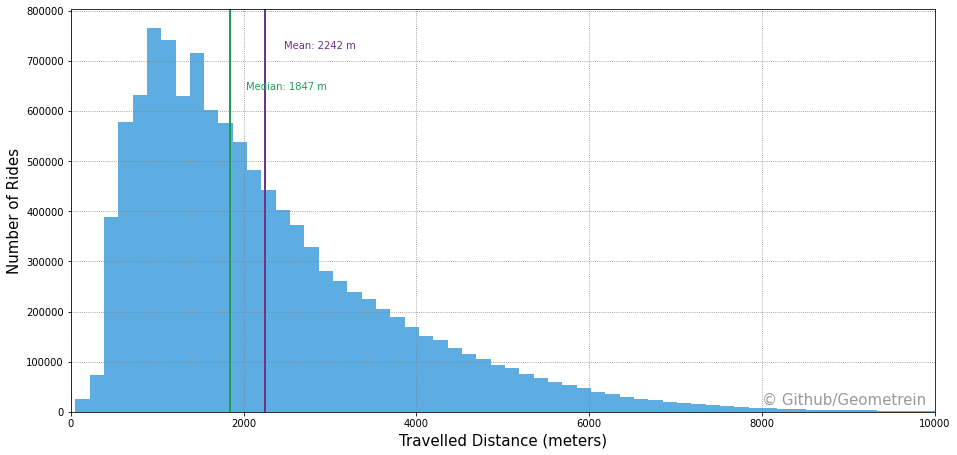

In [41]:
def distance(dataframe):
    """
    """
    df = dataframe.copy()
    
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    data = df["distance"]
    plt.hist(data, bins = 60, color = BLUE)


    plt.axvline(df["distance"].mean(), color=MAGENTA, linestyle='-', linewidth=2 )
    plt.axvline(df["distance"].median(), color=GREEN, linestyle='-', linewidth=2 )
    plt.axvline(df["distance"].median(), color=GREEN, linestyle='-', linewidth=2 )

    min_ylim, max_ylim = plt.ylim()

    plt.text(df["distance"].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f} m'.format(df["distance"].mean()), color = MAGENTA,  fontsize= 10)
    plt.text(df["distance"].median()*1.1, max_ylim*0.8, 'Median: {:.0f} m'.format(df["distance"].median()), color = GREEN, fontsize= 10)

    ax.set_xlim([0,10000])

    # Labeling Axes
    plt.xlabel("Travelled Distance (meters)", fontsize= 15, x = 0.5)
    plt.ylabel("Number of Rides", fontsize= 15)

    # Adding Grid
    plt.grid(linestyle=":", color='grey')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Geometrein',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.8)

    plt.show()

distance(dataframe)

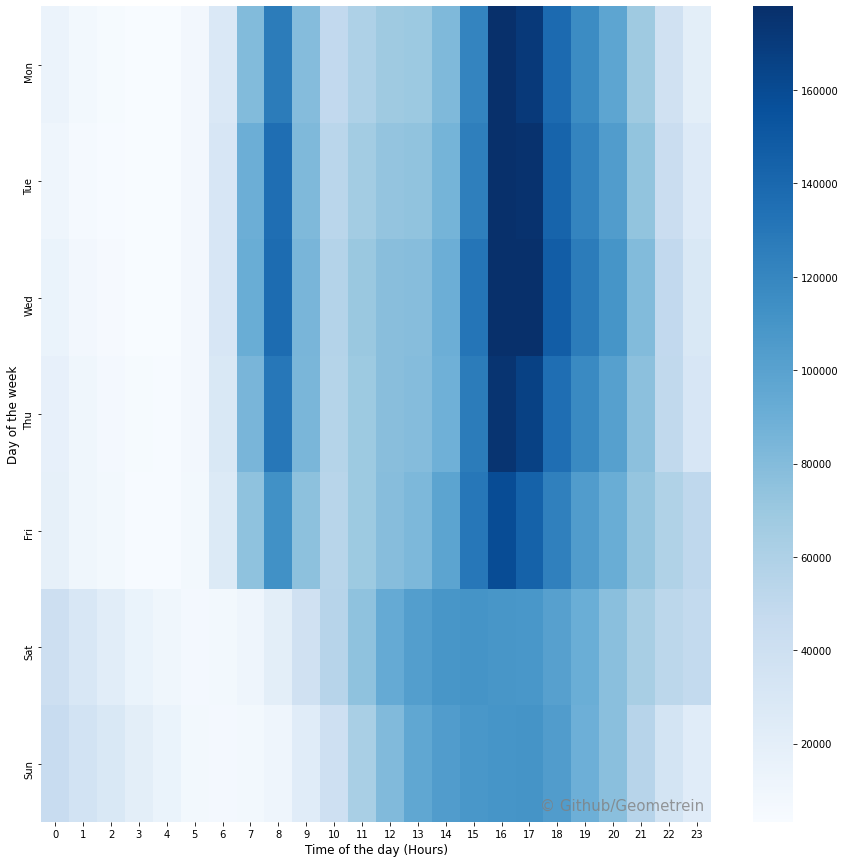

In [42]:
def weekday_heatmap(dataframe):
    """
    """
    weekdays = ["Mon", "Tue","Wed", "Thu", "Fri", "Sat", "Sun"]
    
    # Data
    df = dataframe.copy()
    df["hour"] = pd.DatetimeIndex(df['departure']).hour
    df["weekday"] = pd.DatetimeIndex(df['departure']).weekday
    daily_activity = df.groupby(by=['weekday','hour']).count()['departure_name'].unstack()

    # Figure
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(daily_activity, robust=True, cmap="Blues", yticklabels=weekdays) # "YlOrBr

    # Labeling Axes
    plt.xlabel("Time of the day (Hours)", fontsize= 12, x = 0.5)
    plt.ylabel("Day of the week", fontsize= 12)

    # Watermark
    ax.text(0.99, 0.01, '© Github/Geometrein',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.8)


weekday_heatmap(dataframe)

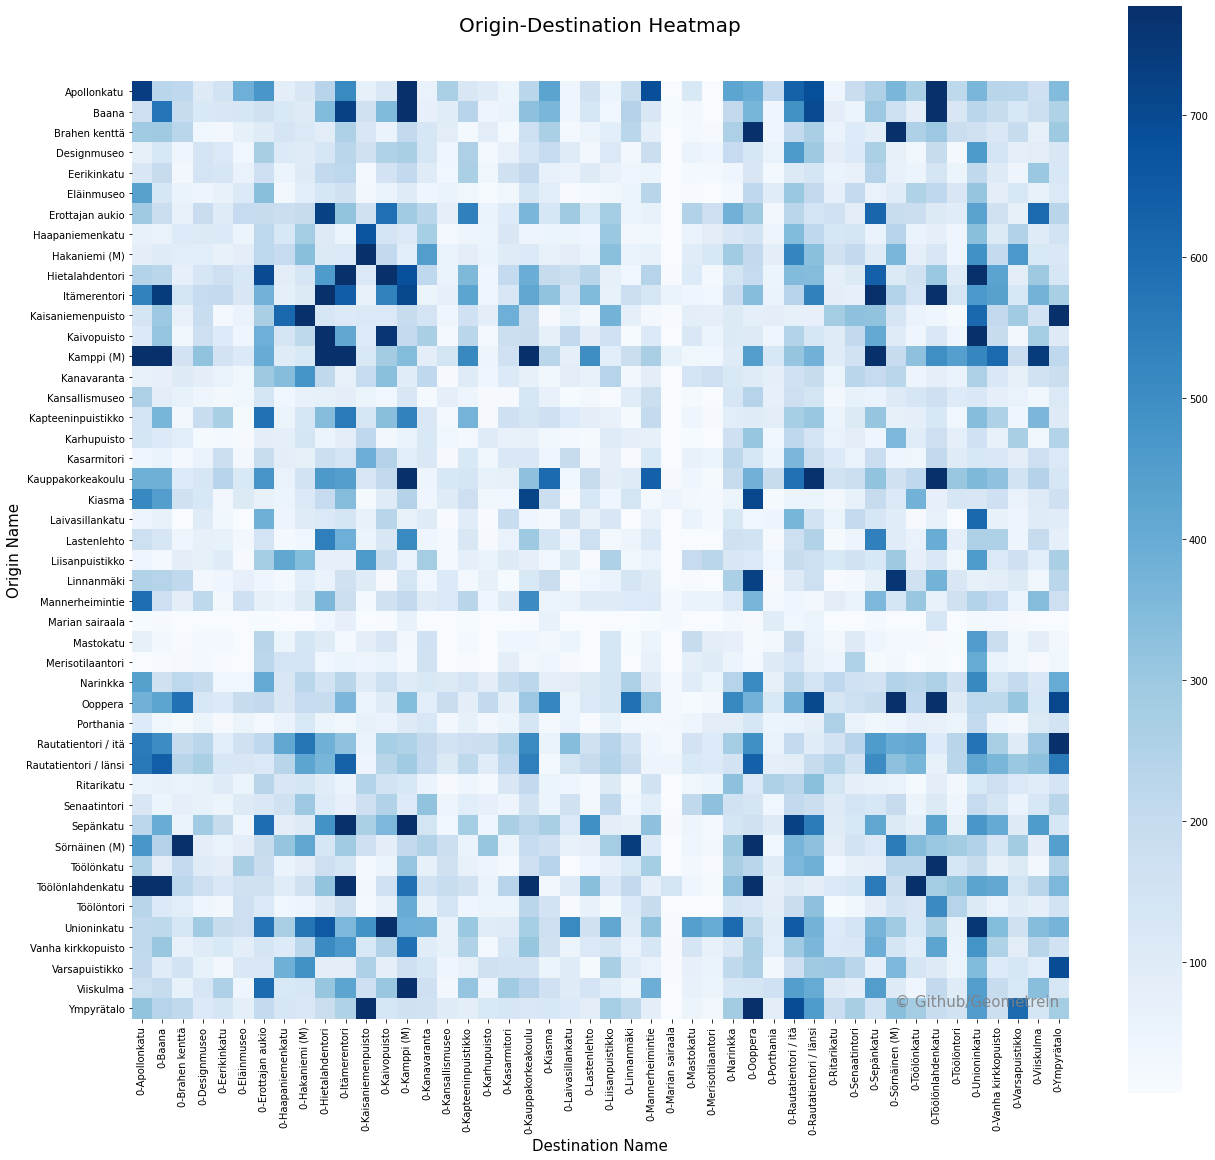

In [43]:
def odHeatmap(dataframe, year):
    """
    """
    df = dataframe.copy()
    df = df[df['departure'].dt.year == year]
    dff = df.groupby(['departure_name', 'return_name']).size()
    dff = dff.sort_values(ascending=False)
    dff = dff.reset_index()
    

    dff = dff.pivot_table(index='departure_name', columns="return_name", fill_value=0)
    dff.sort_index(level=0, ascending=True, inplace=True)
    #print(dff.head())

    fig, ax = plt.subplots(figsize=(21,20))
    sns.heatmap(dff,robust=True, cmap="Blues",square=True)
    
    # Labeling
    ax.set_title('Origin-Destination Heatmap', fontdict={"fontsize":20}, pad = 50)
    ax.set_xlabel("Destination Name", fontsize= 15, x = 0.5)
    ax.set_ylabel("Origin Name", fontsize= 15)

    # Watermark
    ax.text(0.99, 0.01, '© Github/Geometrein',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.9)

odHeatmap(dataframe, 2016)